# Webscraping

In [2]:
## quietly load rvest and tidyverse
suppressPackageStartupMessages(library(rvest))
suppressPackageStartupMessages(library(tidyverse))

## read in wikipedia page.
pop <- read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")

Warning message:
"package 'tidyverse' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.2"

In [3]:
names(pop)

[1] "node" "doc"

In [4]:
## extract heading 2 text
pop %>% 
  html_nodes("h2") %>% 
  html_text(trim = TRUE)

[1] "Contents"             "List[edit]"           "See also[edit]"      
[4] "Notes[edit]"          "References[edit]"     "External links[edit]"
[7] "Navigation menu"

In [5]:
## table
poptabs <- html_table(pop)

In [9]:
poptabs[1:2]

[[1]]
  X1
1 NA
                                                                                                                                               X2
1 It has been suggested that this article be merged into List of countries and dependencies by population. (Discuss) Proposed since January 2018.

[[2]]
                                                                                                  X1
1 Statistical regions as defined by the United Nations Statistics Division.[1]Antarctica is omitted.

In [10]:
## preview poptabs tables
lapply(poptabs, head)

[[1]]
  X1
1 NA
                                                                                                                                               X2
1 It has been suggested that this article be merged into List of countries and dependencies by population. (Discuss) Proposed since January 2018.

[[2]]
                                                                                                  X1
1 Statistical regions as defined by the United Nations Statistics Division.[1]Antarctica is omitted.

[[3]]
  Rank Country or area UN continental\nregion[1] UN statistical\nregion[1]
1               World                                                  
2    1        China[a]                      Asia              Eastern Asia
3    2           India                      Asia             Southern Asia
4    3   United States                  Americas          Northern America
5    4       Indonesia                      Asia        South-Eastern Asia
6    5          Brazil                  Americas             South America
  Population\n(1 July 2016)[2] Population\n(1 July 2017)[2]
1                7,466,964,280                7,550,262,101
2                1,403,500,365                1,409,517,397
3                1,324,171,354                1,339,180,127
4                  322,179,605                  324,459,463
5                  261,115,456                  263,991,379
6                  207,652,865                  209,288,278
                            Change
1 7000111555135228260<U+2660>+1.1%
2 6999428716097982630<U+2660>+0.4%
3 7000113344643460699<U+2660>+1.1%
4 6999707635730076710<U+2660>+0.7%
5 7000110139899186970<U+2660>+1.1%
6 6999787570641031120<U+2660>+0.8%

[[4]]
  v\nt\ne\n\nLists of countries by population statistics
1                                       World population
2                                            Continental
3                                               Regional
4                                                 Cities
5                            Past and future\npopulation
6                                     Population density
                                                                                                      v\nt\ne\n\nLists of countries by population statistics
1                                                                                                    Current population\nCurrent population (United Nations)
2                                                                                                                    Africa\nAmericas\nAsia\nEurope\nOceania
3                 Arab world\nCaribbean\nCommonwealth of Nations\nEurasia\nEuropean Union\nIslands\nLatin America\nNorth America\nMiddle East\nSouth America
4                                                               National capitals\nCities proper\nMetropolitan areas\nUrban areas\nMegacities\nMegalopolises
5 Past population (United Nations)\nPast and future population\n1\n1000\n1500\n1600\n1700\n1800\n1900\n1907\n1939\n1989\n2000\n2005\n2010\nFuture population
6                                                                                       Current density\nCurrent real density based on food growing capacity

In [11]:
## select countries/populations
poptab <- poptabs[[3]]

In [12]:
head(poptab)

Rank,Country or area,UN continental region[1],UN statistical region[1],Population (1 July 2016)[2],Population (1 July 2017)[2],Change
—,World,—,—,"7,466,964,280","7,550,262,101",7000111555135228260<U+2660>+1.1%
1,China[a],Asia,Eastern Asia,"1,403,500,365","1,409,517,397",6999428716097982630<U+2660>+0.4%
2,India,Asia,Southern Asia,"1,324,171,354","1,339,180,127",7000113344643460699<U+2660>+1.1%
3,United States,Americas,Northern America,"322,179,605","324,459,463",6999707635730076710<U+2660>+0.7%
4,Indonesia,Asia,South-Eastern Asia,"261,115,456","263,991,379",7000110139899186970<U+2660>+1.1%
5,Brazil,Americas,South America,"207,652,865","209,288,278",6999787570641031120<U+2660>+0.8%


In [13]:
names(poptab) <- c(
    "rank", "country", "continental_region", "statistical_region", "population_2016",
    "population_2017", "change"
)

In [14]:
## replace dashes
poptab[, 1:ncol(poptab)] <- lapply(poptab, stringr::str_replace_all, "−|\u2212", "-")

In [15]:
head(poptab)

rank,country,continental_region,statistical_region,population_2016,population_2017,change
—,World,—,—,"7,466,964,280","7,550,262,101",7000111555135228260<U+2660>+1.1%
1,China[a],Asia,Eastern Asia,"1,403,500,365","1,409,517,397",6999428716097982630<U+2660>+0.4%
2,India,Asia,Southern Asia,"1,324,171,354","1,339,180,127",7000113344643460699<U+2660>+1.1%
3,United States,Americas,Northern America,"322,179,605","324,459,463",6999707635730076710<U+2660>+0.7%
4,Indonesia,Asia,South-Eastern Asia,"261,115,456","263,991,379",7000110139899186970<U+2660>+1.1%
5,Brazil,Americas,South America,"207,652,865","209,288,278",6999787570641031120<U+2660>+0.8%


In [16]:
## extract the percentage value in change
poptab$change_pct <- stringr::str_extract(poptab$change, "(?<=\\D).*(?=%)")
head(poptab$change_pct)

[1] "+1.1" "+0.4" "+1.1" "+0.7" "+1.1" "+0.8"

In [17]:
## extract the total change number
poptab$change <- stringr::str_extract(poptab$change, "\\-?\\d+")
head(poptab$change)

[1] "7000111555135228260" "6999428716097982630" "7000113344643460699"
[4] "6999707635730076710" "7000110139899186970" "6999787570641031120"

In [18]:
## identify the column(s) that should probably be considered integer or numeric
nums <- c("rank", "population_2016", "population_2017", "change", "change_pct")

In [19]:
## remove everything that's not a number, minus sign, or decimal and convert to numeric
poptab[nums] <- lapply(poptab[nums], function(x)
  as.numeric(stringr::str_replace_all(x, "[^[:digit:]\\-\\.]", "")))

In [20]:
head(poptab)

rank,country,continental_region,statistical_region,population_2016,population_2017,change,change_pct
NA,World,—,—,7466964280,7550262101,7.000112e+18,1.1
1,China[a],Asia,Eastern Asia,1403500365,1409517397,6.999429e+18,0.4
2,India,Asia,Southern Asia,1324171354,1339180127,7.000113e+18,1.1
3,United States,Americas,Northern America,322179605,324459463,6.999708e+18,0.7
4,Indonesia,Asia,South-Eastern Asia,261115456,263991379,7.000110e+18,1.1
5,Brazil,Americas,South America,207652865,209288278,6.999788e+18,0.8


In [21]:
## set rank var as integer
poptab$rank <- as.integer(poptab$rank)

## preview data
head(poptab, 10)

rank,country,continental_region,statistical_region,population_2016,population_2017,change,change_pct
NA,World,—,—,7466964280,7550262101,7.000112e+18,1.1
1,China[a],Asia,Eastern Asia,1403500365,1409517397,6.999429e+18,0.4
2,India,Asia,Southern Asia,1324171354,1339180127,7.000113e+18,1.1
3,United States,Americas,Northern America,322179605,324459463,6.999708e+18,0.7
4,Indonesia,Asia,South-Eastern Asia,261115456,263991379,7.000110e+18,1.1
5,Brazil,Americas,South America,207652865,209288278,6.999788e+18,0.8
6,Pakistan,Asia,Southern Asia,193203476,197015955,7.000197e+18,2.0
7,Nigeria,Africa,Western Africa,185989640,190886311,7.000263e+18,2.6
8,Bangladesh,Asia,Southern Asia,162951560,164669751,7.000105e+18,1.1
9,Russia,Europe,Eastern Europe,143964513,143989754,5.000000e+18,0.0


In [22]:
head(arrange(poptab, -change_pct), 5)

rank,country,continental_region,statistical_region,population_2016,population_2017,change,change_pct
127,Oman,Asia,Western Asia,4424762,4636262,7.000478e+18,4.8
152,Bahrain,Asia,Western Asia,1425171,1492584,7.000473e+18,4.7
57,Niger,Africa,Western Africa,20672987,21477348,7.000389e+18,3.9
157,Equatorial Guinea,Africa,Middle Africa,1221490,1267689,7.000378e+18,3.8
46,Angola,Africa,Middle Africa,28813463,29784193,7.000337e+18,3.4


In [23]:
poptab %>%
    group_by(statistical_region) %>%
    summarise(change_pct = mean(change_pct, na.rm = TRUE)) %>%
    arrange(-abs(change_pct))

statistical_region,change_pct
Middle Africa,2.7444444
Western Africa,2.5000000
Eastern Africa,2.3600000
Western Asia,1.9411765
Northern Africa,1.7714286
Melanesia,1.6800000
Southern Africa,1.6800000
Central Asia,1.6000000
Central America,1.4125000
Southern Asia,1.3888889


In [24]:
## list of starwars movies URLs
star_wars <- list(
  Phantom = "http://www.imdb.com/title/tt0120915",
  Clones = "http://www.imdb.com/title/tt0121765",
  Sith = "http://www.imdb.com/title/tt0121766",
  RogueOne = "http://www.imdb.com/title/tt3748528",  
  NewHope = "http://www.imdb.com/title/tt0076759",
  Empire = "http://www.imdb.com/title/tt0080684",
  ReturnJedi = "http://www.imdb.com/title/tt0086190",
  Awakens = "http://www.imdb.com/title/tt2488496",
  LastJedi = "http://www.imdb.com/title/tt2527336"
)

## read pages as xml data
h <- lapply(star_wars, xml2::read_html)

## view structure of h elements
str(h[1:2], 1)

List of 2
 $ Phantom:List of 2
  ..- attr(*, "class")= chr [1:2] "xml_document" "xml_node"
 $ Clones :List of 2
  ..- attr(*, "class")= chr [1:2] "xml_document" "xml_node"


In [25]:
names(h)

[1] "Phantom"    "Clones"     "Sith"       "RogueOne"   "NewHope"   
[6] "Empire"     "ReturnJedi" "Awakens"    "LastJedi"

In [26]:
h["Clones"][[1]]

{xml_document}
<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body id="styleguide-v2" class="fixed">\n<script>\n    if (typeof uet ==  ...

In [27]:
## function to parse imdb rating
imdb_rating <- function(x) {
  x %>% 
    html_nodes("strong span") %>%
    html_text(trim = TRUE) %>%
    as.numeric()
}

In [28]:
##
## get imdb ratings for each
ratings <- sapply(h, imdb_rating)

head(ratings)

Phantom   Clones     Sith RogueOne  NewHope   Empire 
     6.5      6.6      7.6      7.8      8.7      8.8

In [29]:
## create data frame
df <- data.frame(
  film = names(star_wars),
  rating = ratings,
  stringsAsFactors = FALSE,
  row.names = NULL
)

## preview data
df

film,rating
Phantom,6.5
Clones,6.6
Sith,7.6
RogueOne,7.8
NewHope,8.7
Empire,8.8
ReturnJedi,8.4
Awakens,8.0
LastJedi,7.5


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

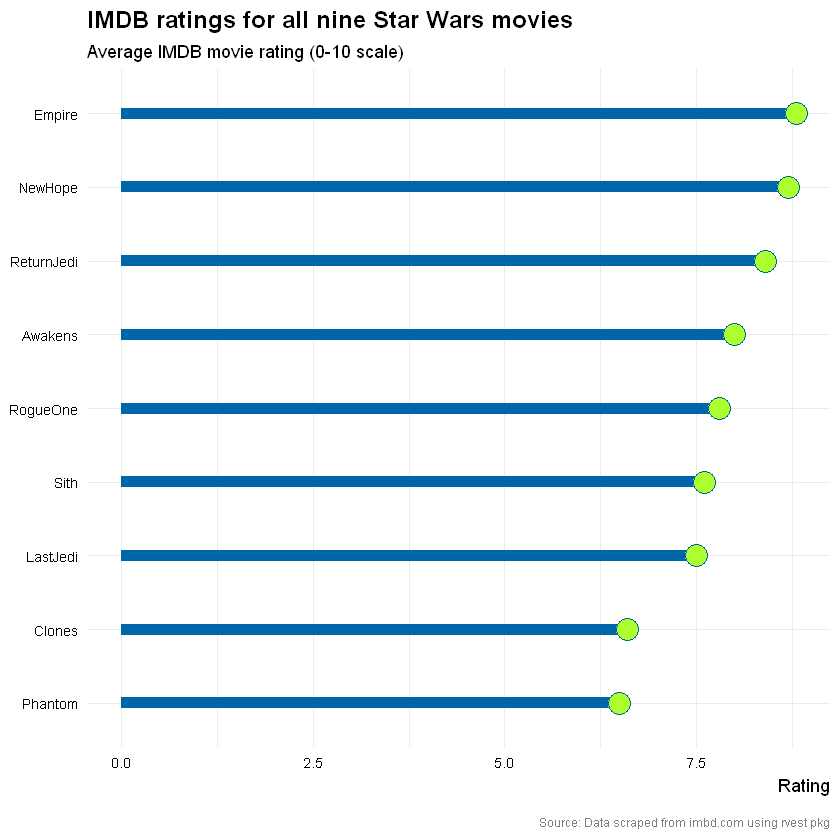

In [30]:
## plot
df %>%
  arrange(rating) %>%
  mutate(film = factor(film, levels = unique(film))) %>%
  ggplot(aes(x = film, y = rating)) +
  geom_col(fill = "#0066aa", width = .15) +
  geom_point(colour = "#0066aa", 
             fill = "greenyellow", shape = 21, size = 6) + 
  theme_minimal(base_family = "Helvetica Neue", base_size = 12) +
  theme(
    legend.position = "bottom",
    plot.caption = element_text(
        hjust = 1.0, colour = "gray50", size = rel(.6)),
    axis.text = element_text(colour = "black", size = rel(.7)),
    axis.title = element_text(hjust = 1.0, size = rel(.9)),
    legend.text = element_text(size = rel(.8)),
    plot.title = element_text(face = "bold")) + 
  labs(
    y = "Rating", x = NULL, 
    title = "IMDB ratings for all nine Star Wars movies",
    subtitle = "Average IMDB movie rating (0-10 scale)",
    caption = "\nSource: Data scraped from imbd.com using rvest pkg") + 
  coord_flip()